Saving synthetic_blobs.csv to synthetic_blobs (2).csv


,Feature_1,Feature_2,Cluster
0,-9.297689,6.473679,3
1,-9.698741,6.938967,3
2,-1.686653,7.793442,0
3,-7.097308,-5.781333,2
4,-10.876452,6.315437,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature_1  300 non-null    float64
 1   Feature_2  300 non-null    float64
 2   Cluster    300 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 7.2 KB


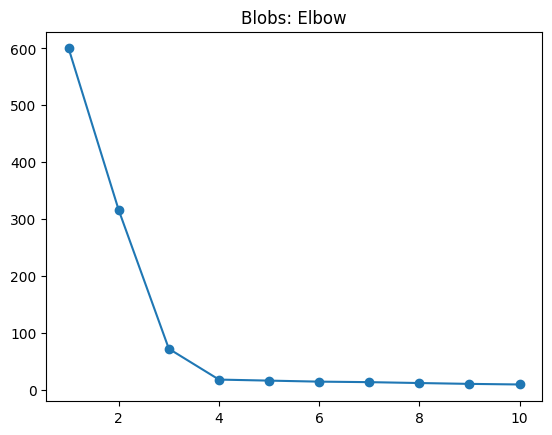

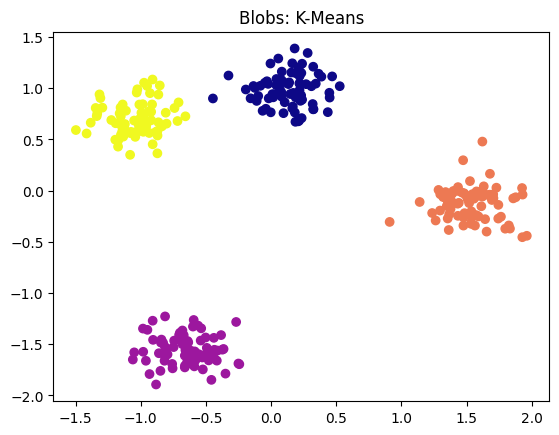

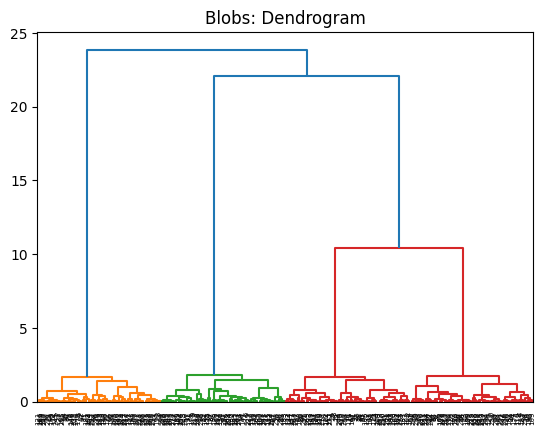

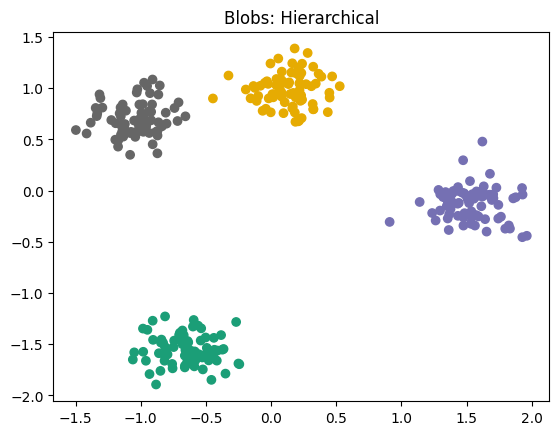

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from google.colab import files

files.upload()
df = pd.read_csv('synthetic_blobs.csv')
display(df.head())
df.info()
X = df[['Feature_1', 'Feature_2']]
X_scaled = StandardScaler().fit_transform(X)
inertia = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Blobs: Elbow')
plt.show()
km = KMeans(n_clusters=4, random_state=42)
labels = km.fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='plasma')
plt.title('Blobs: K-Means')
plt.show()
Z = linkage(X_scaled, method='ward')
dendrogram(Z)
plt.title('Blobs: Dendrogram')
plt.show()
clusters = fcluster(Z, 4, criterion='maxclust')
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='Dark2')
plt.title('Blobs: Hierarchical')
plt.show()
